# __Homework-03 ML for classification__

### __Features__  

For the rest of the homework, you'll need to use the features from the previous homework  with additional two 'neighbourhood_group' and 'room_type'. So the whole feature set will be   set as follows:  
  
'neighbourhood_group',  
'room_type',  
'latitude',  
'longitude',  
'price',  
'minimum_nights',  
'number_of_reviews',  
'reviews_per_month',  
'calculated_host_listings_count',  
'availability_365'  
Select only them and fill in the missing values with 0.  

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

*__Data preparation__*

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [3]:
!wget $data -O AB_NYC_2019.csv

--2021-09-25 18:48:38--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  12.3MB/s    in 0.6s    

2021-09-25 18:48:39 (12.3 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [4]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df = df[['neighbourhood_group', 'room_type', 'latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
df.head(10)

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,brooklyn,private_room,40.64749,-73.97237,149,1,9,0.21,6,365
1,manhattan,entire_home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,manhattan,private_room,40.80902,-73.94190,150,3,0,NaN,1,365
3,brooklyn,entire_home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,manhattan,entire_home/apt,40.79851,-73.94399,80,10,9,0.10,1,0
5,manhattan,entire_home/apt,40.74767,-73.97500,200,3,74,0.59,1,129
6,brooklyn,private_room,40.68688,-73.95596,60,45,49,0.40,1,0
7,manhattan,private_room,40.76489,-73.98493,79,2,430,3.47,1,220
8,manhattan,private_room,40.80178,-73.96723,79,2,118,0.99,1,0
9,manhattan,entire_home/apt,40.71344,-73.99037,150,1,160,1.33,4,188


In [7]:
df.head().T # Transpose is the simple way to look at all columns

,0,1,2,3,4
neighbourhood_group,brooklyn,manhattan,manhattan,brooklyn,manhattan
room_type,private_room,entire_home/apt,private_room,entire_home/apt,entire_home/apt
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
price,149,225,150,89,80
minimum_nights,1,1,3,1,10
number_of_reviews,9,45,0,270,9
reviews_per_month,0.21,0.38,NaN,4.64,0.1
calculated_host_listings_count,6,2,1,1,1
availability_365,365,355,365,194,0


In [8]:
df['above_average'] = (df.price >= 152).astype(int) #making price binary

In [9]:
df.reviews_per_month = df.reviews_per_month.fillna(0)
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
above_average                     0
dtype: int64

### __Question 1__  
  
__What is the most frequent observation (mode) for the column 'neighbourhood_group'?__  
  
*Split the data*  
* Split your data in train/val/test sets, with 60%/20%/20% distribution.  
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.  
* Make sure that the target value ('price') is not in your dataframe.  

*__Setting up the validation framework__*

In [10]:
from sklearn.model_selection import train_test_split # importing sklearn

In [11]:
test_size = 0.2
df_full_train, df_test = train_test_split(df, test_size=test_size, random_state=42)

In [12]:
val_size = test_size/(1-test_size)
df_train, df_val = train_test_split(df_full_train, test_size=val_size, random_state=42)

In [13]:
len(df_train), len(df_val), len(df_test), len(df)

(29337, 9779, 9779, 48895)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)
df_train.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,brooklyn,entire_home/apt,40.72760,-73.94495,99,3,29,0.70,13,50,0
1,manhattan,private_room,40.70847,-74.00498,57,1,0,0.00,1,7,0
2,bronx,entire_home/apt,40.83149,-73.92766,70,40,0,0.00,1,0,0
3,brooklyn,entire_home/apt,40.66448,-73.99407,130,2,3,0.08,1,0,0
4,manhattan,private_room,40.74118,-74.00012,110,1,48,1.80,2,67,0


In [15]:
y_train = df_train.above_average.values
y_val   = df_val.above_average.values
y_test  = df_test.above_average.values

del df_train['price']
del df_val['price']
del df_test['price']
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [16]:
df_train.columns

Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

*__EDA__*

In [17]:
# checking observations for 'neighbourhood_group' column
df_full_train.neighbourhood_group.value_counts(), df.neighbourhood_group.value_counts()

(manhattan        17380
 brooklyn         16096
 queens            4482
 bronx              864
 staten_island      294
 Name: neighbourhood_group, dtype: int64,
 manhattan        21661
 brooklyn         20104
 queens            5666
 bronx             1091
 staten_island      373
 Name: neighbourhood_group, dtype: int64)

*__ANSWER Q1__*: manhattan

## __Question 2__  
Create the correlation matrix for the numerical features of your train dataset.  
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.  
  
__What are the two features that have the biggest correlation in this dataset?__  
  
*Make price binary*  
* We need to turn the price variable from numeric into binary.
* Let's create a variable above_average which is 1 if the price is above (or equal to) 152.

In [18]:
# Build a correllation matrix
numerical = list(df_full_train.dtypes[(df_full_train.dtypes.values == 'float64') | (df_full_train.dtypes.values == 'int')].index)

corr_df = df_full_train[numerical]
corrMatrix = corr_df.corr()
corrMatrix

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
latitude,1.000000,0.080704,0.035015,0.025497,-0.011836,-0.013809,0.020299,-0.008341,0.056281
longitude,0.080704,1.000000,-0.149080,-0.063498,0.057570,0.134401,-0.115289,0.082994,-0.267852
price,0.035015,-0.149080,1.000000,0.042740,-0.048926,-0.051978,0.055336,0.080562,0.411250
minimum_nights,0.025497,-0.063498,0.042740,1.000000,-0.077860,-0.121687,0.121748,0.140596,0.032320
number_of_reviews,-0.011836,0.057570,-0.048926,-0.077860,1.000000,0.584935,-0.072603,0.175428,-0.053921
reviews_per_month,-0.013809,0.134401,-0.051978,-0.121687,0.584935,1.000000,-0.047368,0.165565,-0.055888
calculated_host_listings_count,0.020299,-0.115289,0.055336,0.121748,-0.072603,-0.047368,1.000000,0.223328,0.171793
availability_365,-0.008341,0.082994,0.080562,0.140596,0.175428,0.165565,0.223328,1.000000,0.102623
above_average,0.056281,-0.267852,0.411250,0.032320,-0.053921,-0.055888,0.171793,0.102623,1.000000


In [19]:
import seaborn as sn
import matplotlib.pyplot as plt

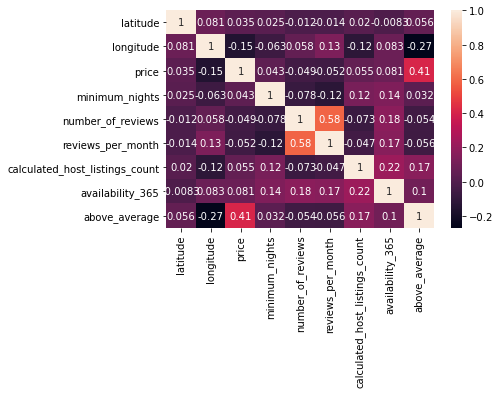

In [20]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

*__ANSWER Q2__*: 'number_of_reviews' and 'reviews_per_month'

## __Question 3__  
  
* Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
  
__Which of these two variables has bigger score?__  
  
Round it to 2 decimal digits using round(score, 2)

In [21]:
from sklearn.metrics import mutual_info_score

In [22]:
df_full_train.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,brooklyn,entire_home/apt,40.71577,-73.95530,295,3,11,0.87,1,1,1
1,manhattan,private_room,40.84917,-73.94048,70,2,2,0.16,1,0,0
2,brooklyn,private_room,40.68993,-73.95947,58,2,0,0.00,2,0,0
3,brooklyn,entire_home/apt,40.68427,-73.93118,75,3,87,4.91,1,267,0
4,queens,private_room,40.74705,-73.89564,38,5,13,0.25,1,0,0


In [23]:
print(mutual_info_score(df_full_train.above_average, df_full_train.neighbourhood_group).round(2))
print(mutual_info_score(df_full_train.above_average, df_full_train.room_type).round(2))

0.05
0.14


*__ANSWER Q3__*: 'room_type'

## __Question 4__  
  
Now let's train a logistic regression  
  
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.  
* Fit the model on the training dataset.
* To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:  
  
  *model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)*  

__Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.__

*__Do one hot encoding and etc__*

In [24]:
from sklearn.feature_extraction import DictVectorizer

In [25]:
categorical = list(df_train.dtypes[(df_train.dtypes.values == 'object')].index)
numerical = list(df_train.dtypes[(df_train.dtypes.values == 'float64') | (df_train.dtypes.values == 'int')].index)

categorical, numerical

(['neighbourhood_group', 'room_type'],
 ['latitude',
  'longitude',
  'minimum_nights',
  'number_of_reviews',
  'reviews_per_month',
  'calculated_host_listings_count',
  'availability_365'])

In [26]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records') 


In [27]:
dv = DictVectorizer(sparse=False) 
X_train = dv.fit_transform(train_dicts)
X_train.shape

(29337, 15)

In [28]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records') #doing the same for validation DS
X_val = dv.transform(val_dicts)

In [29]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=bronx',
 'neighbourhood_group=brooklyn',
 'neighbourhood_group=manhattan',
 'neighbourhood_group=queens',
 'neighbourhood_group=staten_island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=entire_home/apt',
 'room_type=private_room',
 'room_type=shared_room']

*__Training the model__*

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [32]:
model.coef_[0].round(3)

array([ 3.000e-03,  4.000e-03, -5.937e+00, -3.232e+00, -1.100e-02,
       -9.600e-02,  1.330e-01,  1.591e+00, -2.400e-02, -1.664e+00,
       -3.000e-03, -4.200e-02,  1.950e+00, -8.340e-01, -1.174e+00])

In [33]:
model.intercept_[0]

-0.06164379732380669

In [34]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.02855807, 0.59666072, 0.42732656, ..., 0.11409078, 0.03440266,
       0.52656173])

In [35]:
price_decision = (y_pred > 0.5)
price_decision

array([False,  True, False, ..., False, False,  True])

In [36]:
df_val[price_decision].head()

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,brooklyn,entire_home/apt,40.68498,-73.96618,14,4,0.11,2,343
4,manhattan,entire_home/apt,40.76075,-73.99893,30,0,0.00,18,365
6,manhattan,entire_home/apt,40.73243,-74.00932,4,1,0.03,1,0
7,manhattan,entire_home/apt,40.80630,-73.96268,7,2,0.05,1,0
9,manhattan,entire_home/apt,40.80861,-73.94574,3,123,1.73,3,248


In [37]:
(y_val == price_decision).mean().round(2)

0.79

*__ANSWER Q4__*: 79%

## __Question 5__  
  
We have 9 features: 7 numerical features and 2 categorical.  
Let's find the least useful one using the feature elimination technique.  
* Train a model with all these features (using the same parameters as in Q4).  
*  Now exclude each feature from this set and train a model without it. Record the accuracy for each model.  
*  For each feature, calculate the difference between the original accuracy and the accuracy without the feature.  
  
__Which of following feature has the smallest difference?__  
* *neighbourhood_group*
* *room_type*
* *number_of_reviews*
* *reviews_per_month*

In [38]:
def TrainModel(features):
    train_dicts = df_train[features].to_dict(orient='records')
    dv = DictVectorizer(sparse=False) 
    X_train = dv.fit_transform(train_dicts)
    
    val_dicts = df_val[features].to_dict(orient='records') #doing the same for validation DS
    X_val = dv.transform(val_dicts)
    
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=2000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    price_decision = (y_pred > 0.5)
    
    return (y_val == price_decision).mean()

In [39]:
all_features = numerical + categorical;

all_features_prec = TrainModel(all_features)
print(all_features_prec)

for feature in all_features:
    features_to_train = all_features.copy()
    features_to_train.remove(feature)
    prec = TrainModel(features_to_train)
    print(feature, ': ', (all_features_prec - prec))

0.7909806728704366
latitude :  0.003988137846405504
longitude :  0.003988137846405504
minimum_nights :  -0.00030677983433891054
number_of_reviews :  -0.0005112997238981842
reviews_per_month :  0.0003067798343387995
calculated_host_listings_count :  0.0014316392269148048
availability_365 :  0.00951017486450556
neighbourhood_group :  0.03998363840883523
room_type :  0.06258308620513342


*__ANSWER Q5__*: reviews_per_month  
  
number_of_reviews :   -0.0005112997238981842  
reviews_per_month :    0.0003067798343387995

In [40]:

dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'availability_365': 0.003,
 'calculated_host_listings_count': 0.004,
 'latitude': -5.937,
 'longitude': -3.232,
 'minimum_nights': -0.011,
 'neighbourhood_group=bronx': -0.096,
 'neighbourhood_group=brooklyn': 0.133,
 'neighbourhood_group=manhattan': 1.591,
 'neighbourhood_group=queens': -0.024,
 'neighbourhood_group=staten_island': -1.664,
 'number_of_reviews': -0.003,
 'reviews_per_month': -0.042,
 'room_type=entire_home/apt': 1.95,
 'room_type=private_room': -0.834,
 'room_type=shared_room': -1.174}

## __Question 6__  
  
For this question, we'll see how to use a linear regression model from Scikit-Learn  
  
* We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.  
* Fit the Ridge regression model on the training data.  
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]  
  
__Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.__  
  
If there are multiple options, select the smallest alpha.

In [41]:
df_full_train_p, df_test_p = train_test_split(df, test_size=test_size, random_state=42)
df_train_p, df_val_p = train_test_split(df_full_train_p, test_size=val_size, random_state=42)

df_train_p = df_train_p.reset_index(drop=True)
df_val_p = df_val_p.reset_index(drop=True)
df_test_p = df_test_p.reset_index(drop=True)
df_full_train_p = df_full_train_p.reset_index(drop=True)

y_train_p = np.log1p(df_train_p.price.values)
y_val_p   = np.log1p(df_val_p.price.values)
y_test_p  = np.log1p(df_test_p.price.values)

del df_train_p['price']
del df_val_p['price']
del df_test_p['price']
del df_train_p['above_average']
del df_val_p['above_average']
del df_test_p['above_average']

y_train_p, df_train_p.head(2).to_dict(orient='records')

(array([4.60517019, 4.06044301, 4.26267988, ..., 5.70378247, 4.18965474,
        4.53259949]),
 [{'neighbourhood_group': 'brooklyn',
   'room_type': 'entire_home/apt',
   'latitude': 40.7276,
   'longitude': -73.94495,
   'minimum_nights': 3,
   'number_of_reviews': 29,
   'reviews_per_month': 0.7,
   'calculated_host_listings_count': 13,
   'availability_365': 50},
  {'neighbourhood_group': 'manhattan',
   'room_type': 'private_room',
   'latitude': 40.70847,
   'longitude': -74.00498,
   'minimum_nights': 1,
   'number_of_reviews': 0,
   'reviews_per_month': 0.0,
   'calculated_host_listings_count': 1,
   'availability_365': 7}])

In [42]:
from sklearn.linear_model import Ridge
from IPython.display import display

In [43]:
def TrainModel_Ridge(features, alpha=1):
    train_dicts = df_train_p[features].to_dict(orient='records')
    dv = DictVectorizer(sparse=False) 
    X_train_p = dv.fit_transform(train_dicts)
    
    val_dicts = df_val_p[features].to_dict(orient='records') #doing the same for validation DS
    X_val_p = dv.transform(val_dicts)
    
    model = Ridge(alpha)
    model.fit(X_train_p, y_train_p)

    y_pred = model.predict(X_val_p)

    return y_pred
    

In [44]:
def rmse(yp, y_predp):
    se = (yp - y_predp) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [45]:
y_pred_p = TrainModel_Ridge(all_features, 1)
rmse(y_val_p, y_pred_p)

0.49713953633200497

In [46]:
y_val_p[10:20], y_pred_p[10:20]


(array([5.22574667, 4.51085951, 4.83628191, 6.32972091, 4.65396035,
        5.420535  , 5.52545294, 4.26267988, 4.87519732, 5.24702407]),
 array([5.19325679, 4.49659581, 5.1150361 , 5.26875241, 5.27882297,
        5.11192979, 4.84491636, 4.52501756, 4.96887819, 5.45578695]))

In [47]:
alphas = [0, 0.01, 0.1, 1, 10]

for a in alphas:
    y_pred_p = TrainModel_Ridge(all_features, alpha=a)
    print('alpha ', a, ': ', rmse(y_val_p, y_pred_p).round(3))

alpha  0 :  0.497
alpha  0.01 :  0.497
alpha  0.1 :  0.497
alpha  1 :  0.497
alpha  10 :  0.498


*__ANSWER Q6__*: 0